In [1]:
from pycocotools.coco import COCO
import layoutparser as lp
import random
import cv2

In [25]:
def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List): 
            a list of coco annotaions for the current image 
        coco (`optional`, defaults to `False`):  
            COCO annotation object instance. If set, this function will 
            convert the loaded annotation category ids to category names 
            set in COCO.categories
    """
    layout = lp.Layout()

    for ele in annotations:

        x, y, w, h = ele['bbox']

        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )
    return layout

In [23]:
COCO_PATH  = './results/annotations.json'
IMAGE_PATH = './data/prima/Images'
coco = COCO(COCO_PATH)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [29]:
color_map = {
    'Backgorund':   'black',
    'Paragraph':  'blue',
    'Heading':   'green',
    'Outlines':  'purple',
    'OtherText': 'pink',
    'ImageRegion': 'red',
    'TableRegion': 'orange',
    'MathsRegion': 'yellow',
    'SeparatorRegion': 'brown',
    'OtherRegion': 'grey',
}


for image_id in random.sample(coco.imgs.keys(), 1):
    image_info = coco.imgs[image_id]
    annotations = coco.loadAnns(coco.getAnnIds([image_id]))
    
    image = cv2.imread(f'{IMAGE_PATH}/{image_info["file_name"]}')
    layout = load_coco_annotations(annotations, coco)
    
    viz = lp.draw_box(image, layout, color_map=color_map)

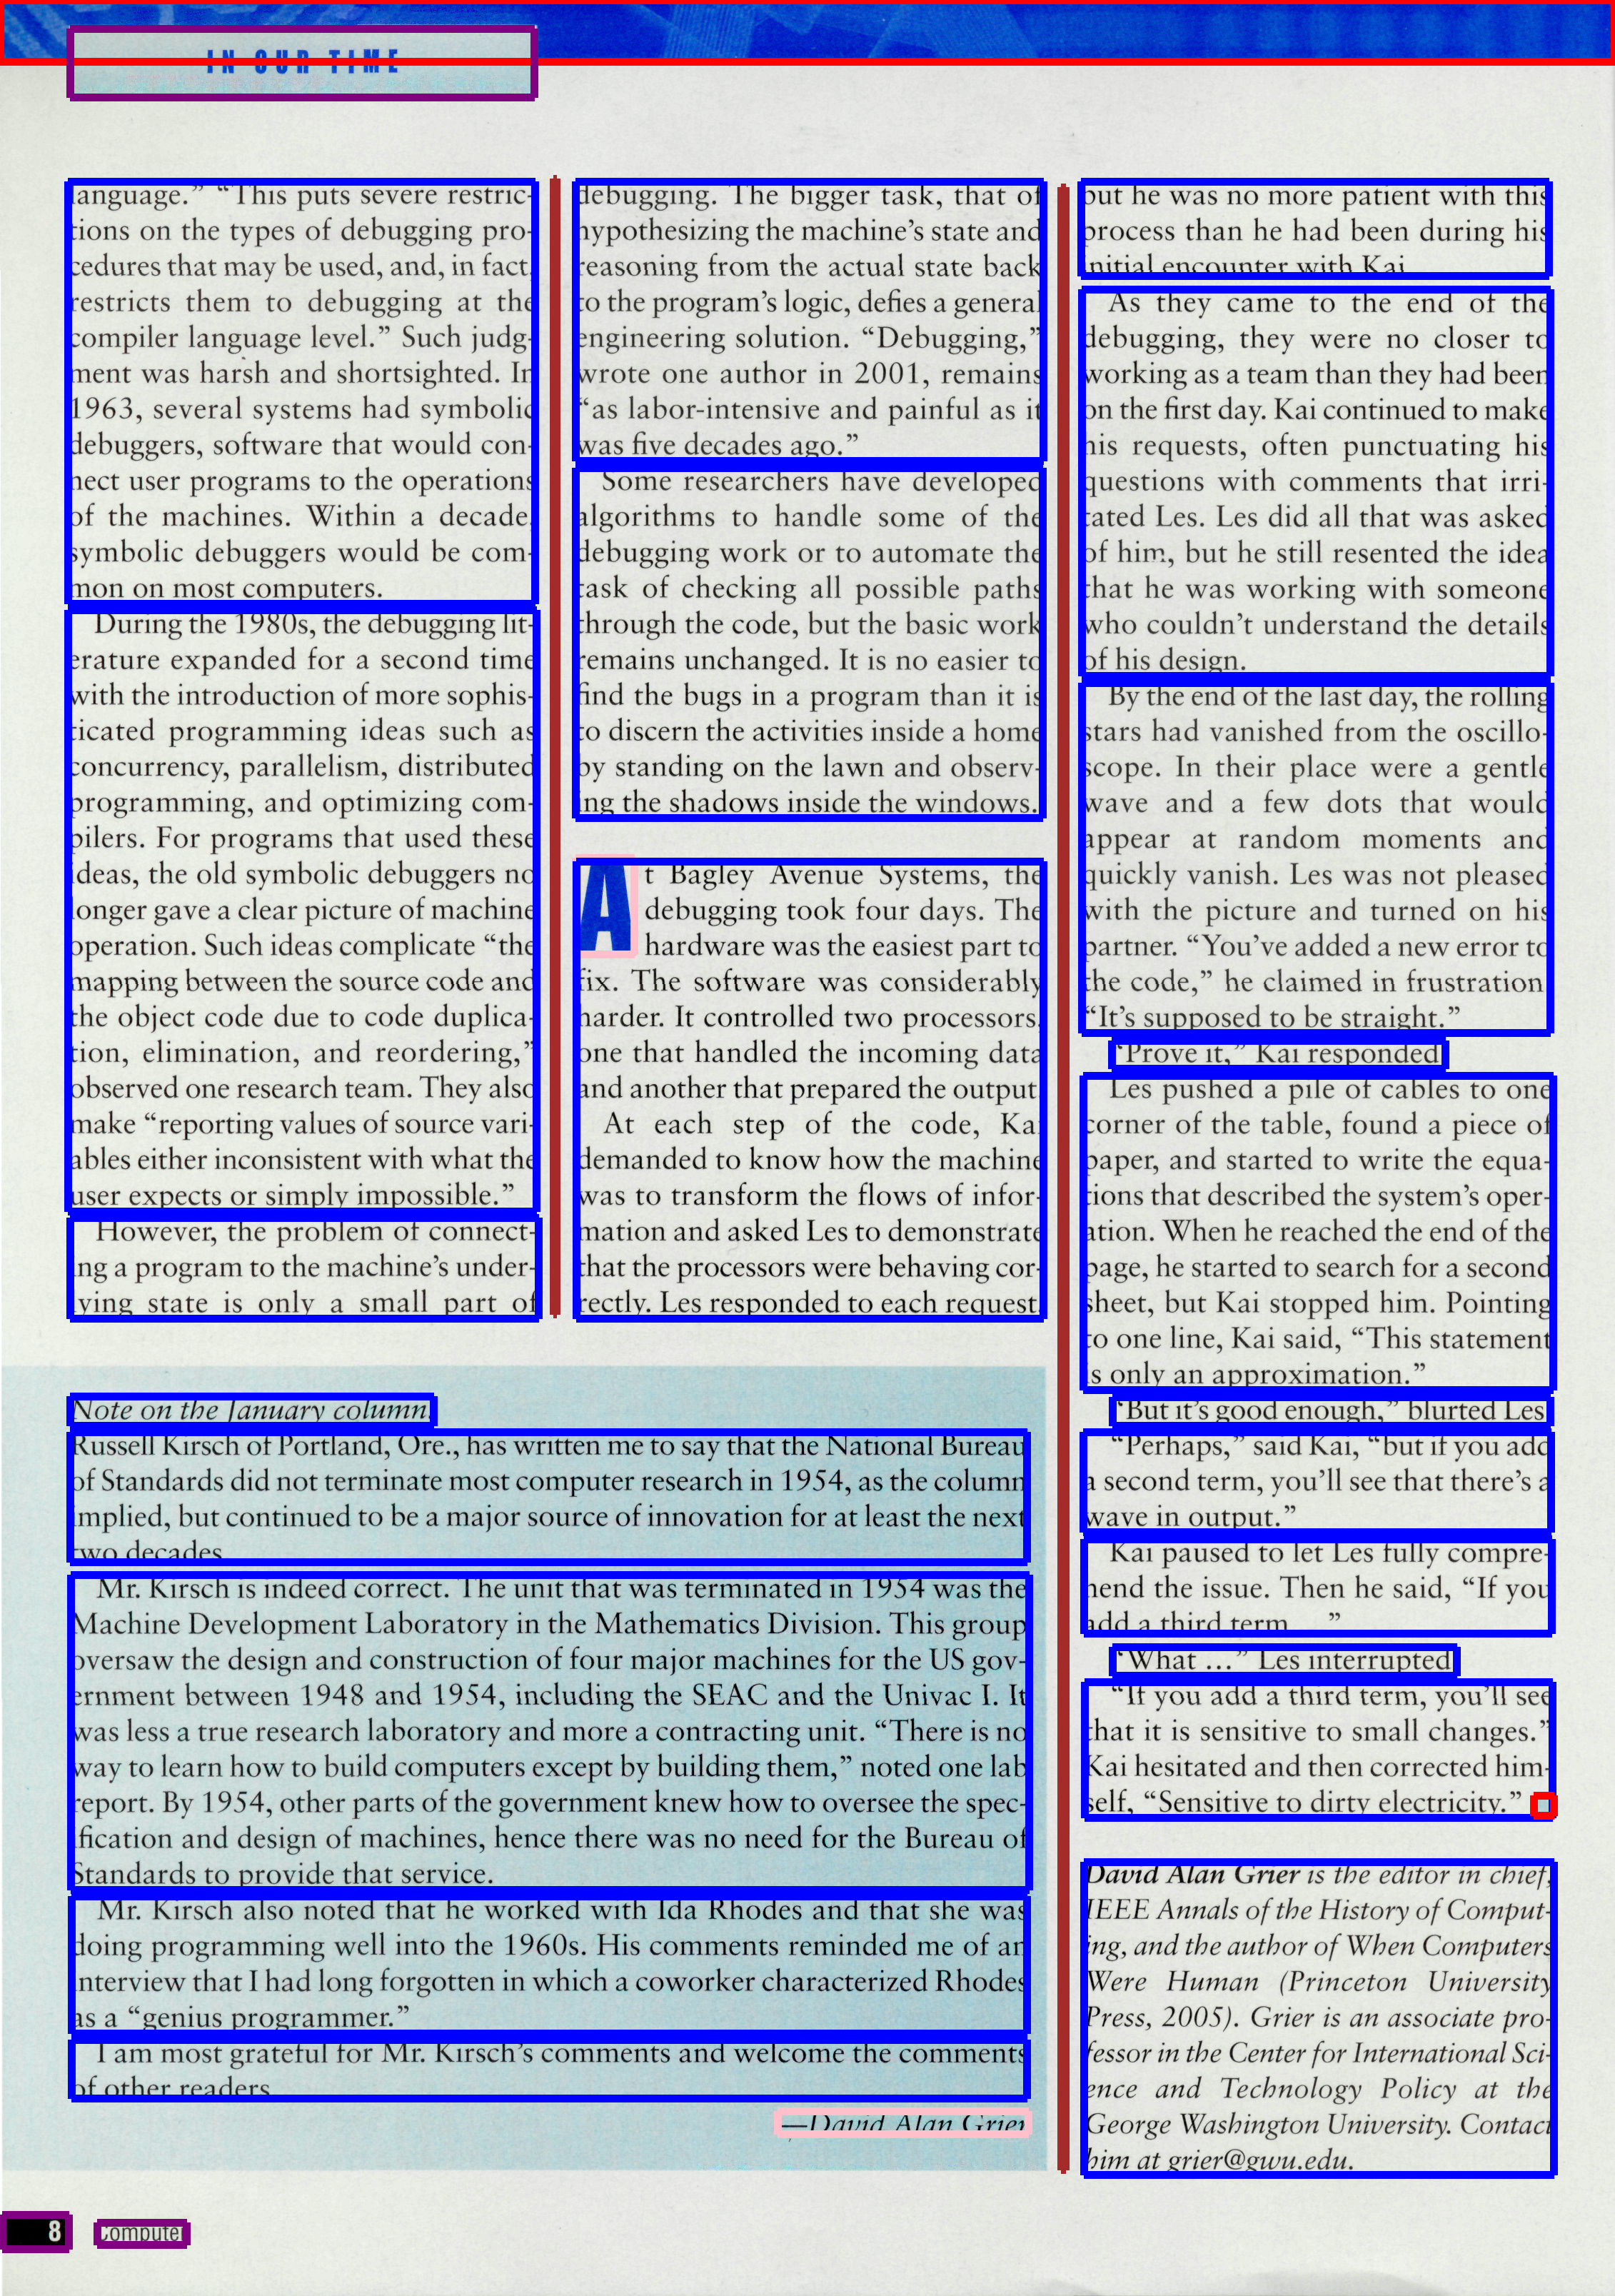

In [30]:
viz